# Elliptic Integrals: Theory and Computation

## Introduction

Elliptic integrals arise naturally in problems involving arc lengths of ellipses, pendulum motion, and many other areas of physics and engineering. These integrals cannot be expressed in terms of elementary functions, making them a fundamental class of special functions in mathematical physics.

## Mathematical Foundations

### Incomplete Elliptic Integrals

The three canonical forms of incomplete elliptic integrals are:

**First Kind:**
$$F(\phi, k) = \int_0^{\phi} \frac{d\theta}{\sqrt{1 - k^2 \sin^2 \theta}}$$

**Second Kind:**
$$E(\phi, k) = \int_0^{\phi} \sqrt{1 - k^2 \sin^2 \theta} \, d\theta$$

**Third Kind:**
$$\Pi(n; \phi, k) = \int_0^{\phi} \frac{d\theta}{(1 - n \sin^2 \theta)\sqrt{1 - k^2 \sin^2 \theta}}$$

where $k$ is called the **elliptic modulus** (with $0 \leq k \leq 1$), $\phi$ is the **amplitude**, and $n$ is the **characteristic** for the third kind.

### Complete Elliptic Integrals

When $\phi = \pi/2$, we obtain the complete elliptic integrals:

$$K(k) = F\left(\frac{\pi}{2}, k\right) = \int_0^{\pi/2} \frac{d\theta}{\sqrt{1 - k^2 \sin^2 \theta}}$$

$$E(k) = E\left(\frac{\pi}{2}, k\right) = \int_0^{\pi/2} \sqrt{1 - k^2 \sin^2 \theta} \, d\theta$$

### Legendre's Relation

A fundamental identity connecting complete elliptic integrals of the first and second kinds:

$$E(k) K(k') + E(k') K(k) - K(k) K(k') = \frac{\pi}{2}$$

where $k' = \sqrt{1 - k^2}$ is the complementary modulus.

### Physical Applications

**Pendulum Period:** The exact period of a simple pendulum with amplitude $\theta_0$ is:

$$T = 4\sqrt{\frac{L}{g}} K\left(\sin\frac{\theta_0}{2}\right)$$

**Ellipse Arc Length:** The circumference of an ellipse with semi-axes $a$ and $b$ is:

$$C = 4a E(e)$$

where $e = \sqrt{1 - (b/a)^2}$ is the eccentricity.

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

# Set up high-quality plot styling
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['legend.fontsize'] = 10

## Computational Analysis

We now compute and visualize the elliptic integrals using SciPy's special functions module. Note that SciPy uses the parameter $m = k^2$ convention.

(0.0, 5.0)

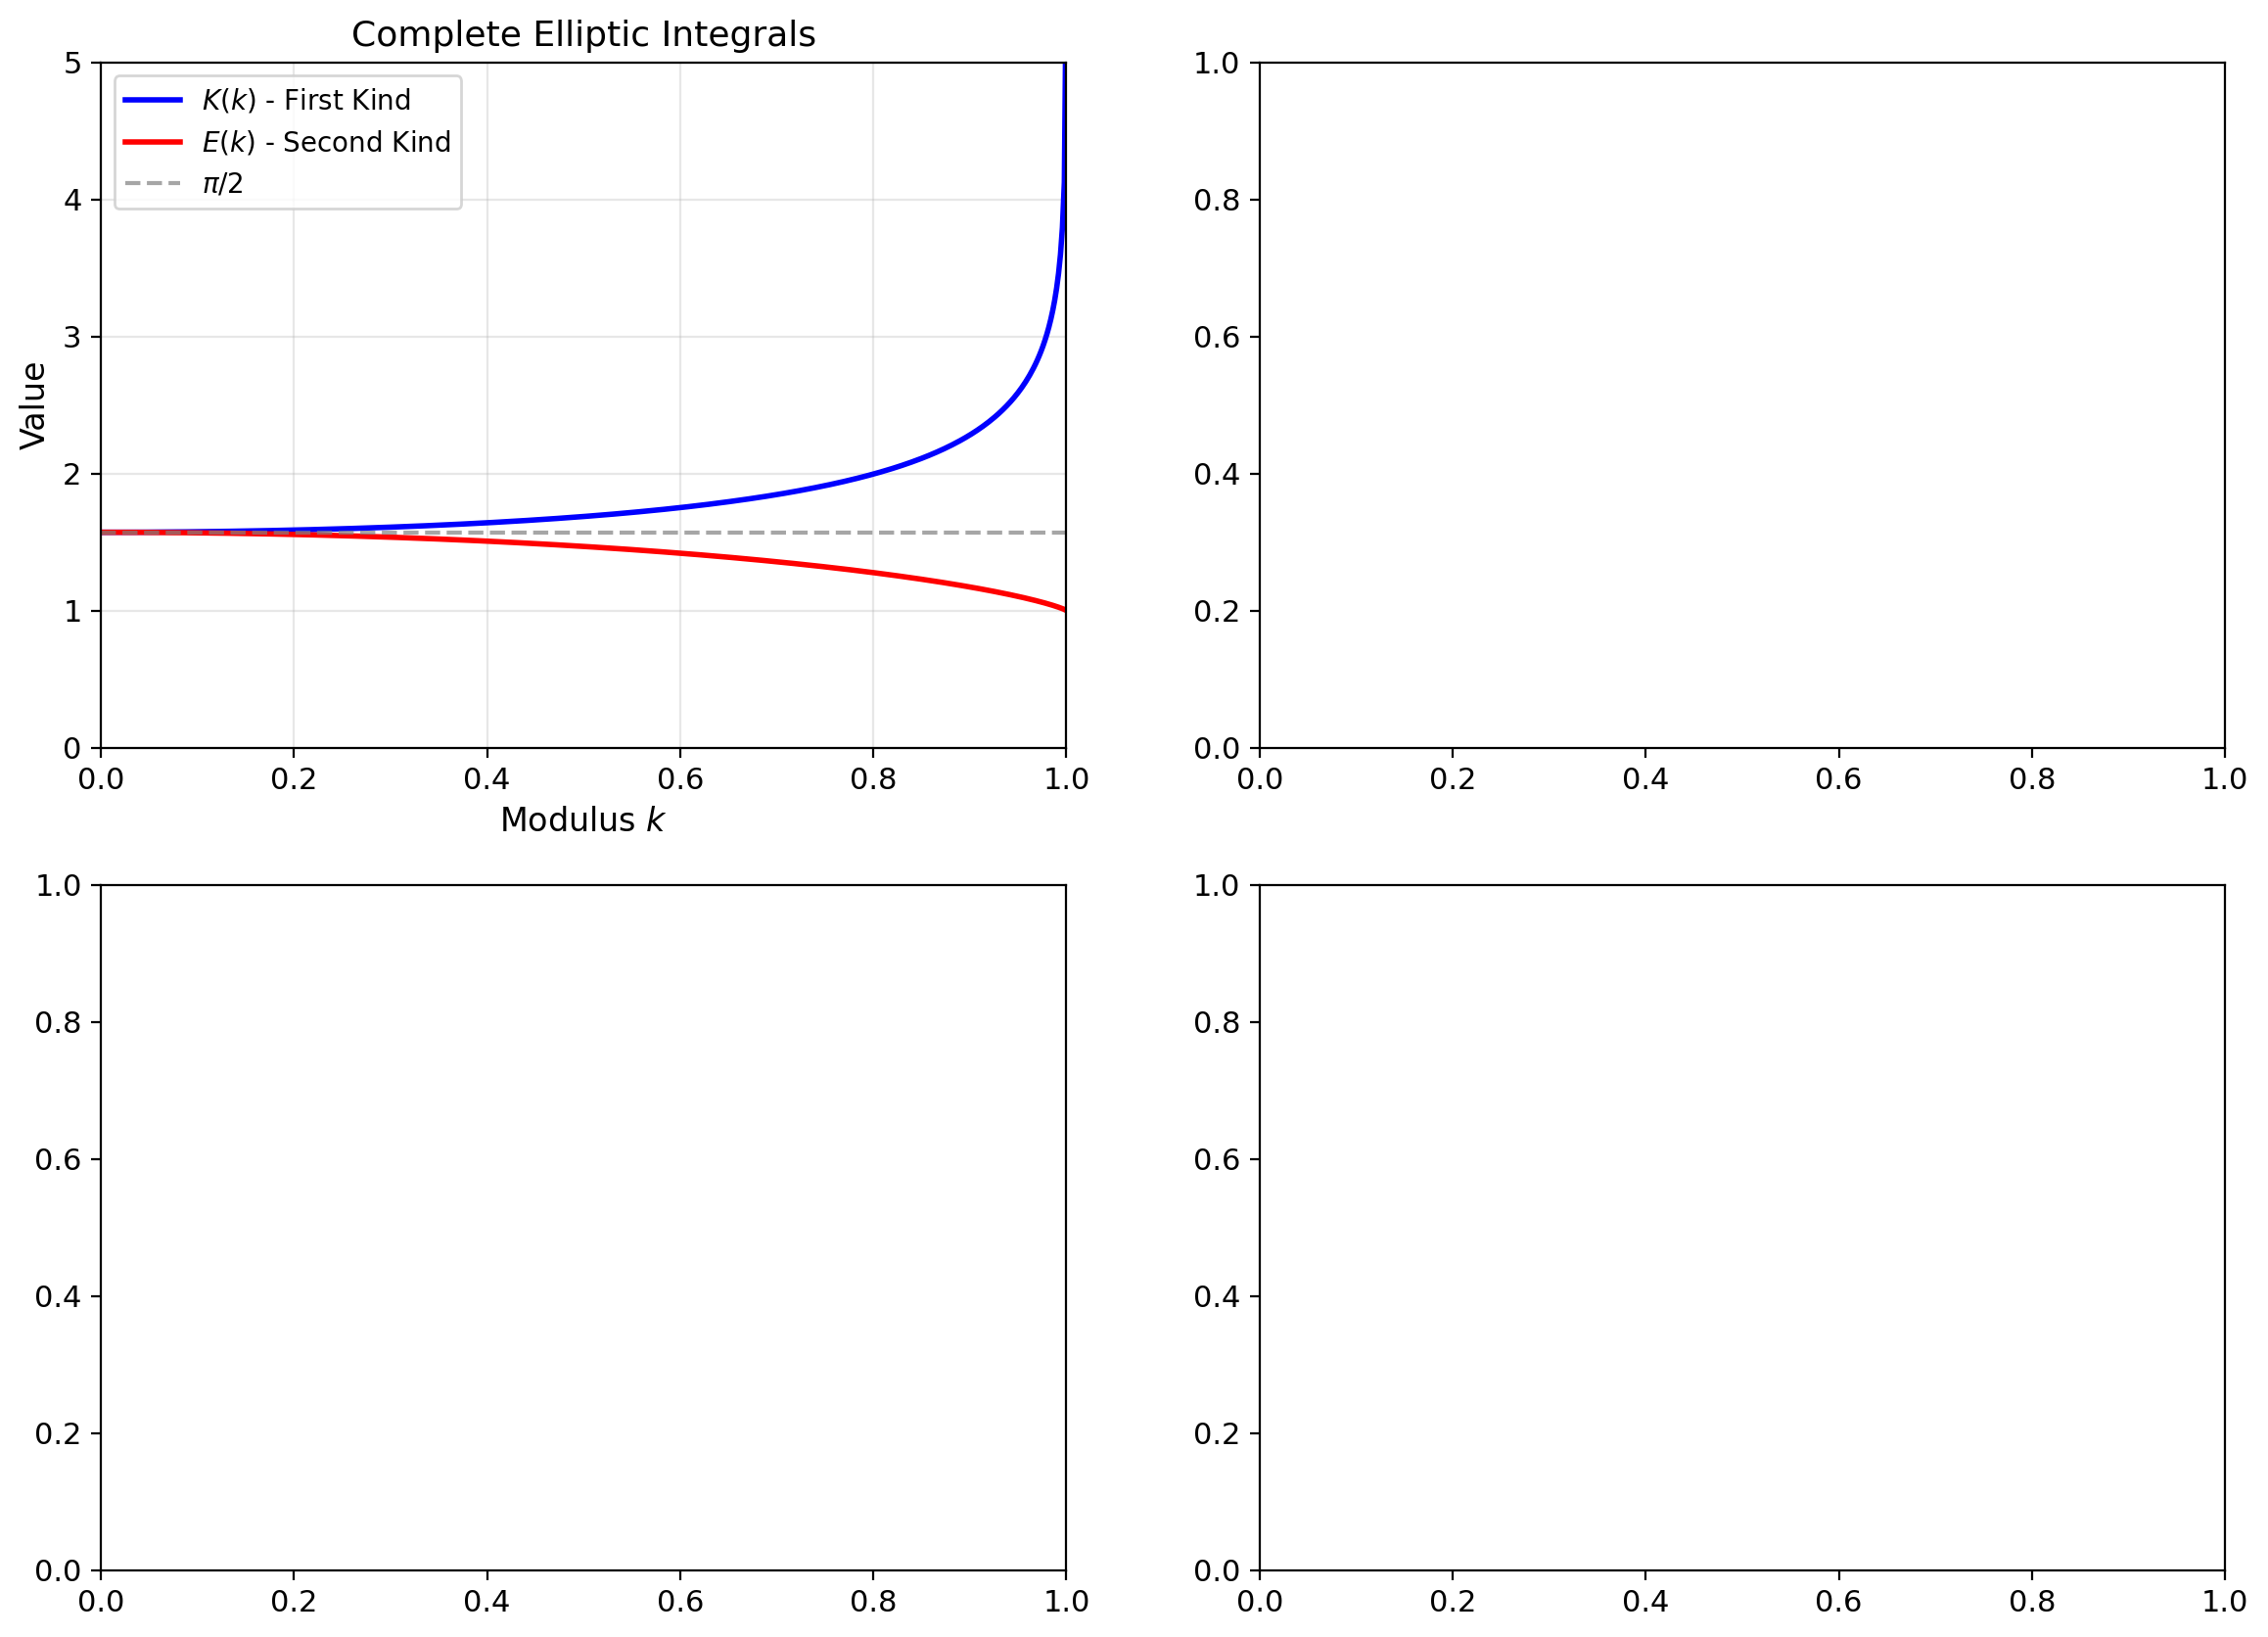

In [2]:
# Define modulus values
k = np.linspace(0, 0.9999, 500)
m = k**2  # SciPy uses m = k^2 parameter

# Compute complete elliptic integrals
K_complete = special.ellipk(m)  # First kind
E_complete = special.ellipe(m)  # Second kind

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Complete elliptic integrals K(k) and E(k)
ax1 = axes[0, 0]
ax1.plot(k, K_complete, 'b-', linewidth=2, label=r'$K(k)$ - First Kind')
ax1.plot(k, E_complete, 'r-', linewidth=2, label=r'$E(k)$ - Second Kind')
ax1.axhline(y=np.pi/2, color='gray', linestyle='--', alpha=0.7, label=r'$\pi/2$')
ax1.set_xlabel(r'Modulus $k$')
ax1.set_ylabel('Value')
ax1.set_title('Complete Elliptic Integrals')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 5)

In [3]:
# Plot 2: Incomplete elliptic integrals for various k values
ax2 = axes[0, 1]
phi = np.linspace(0, np.pi/2, 200)
k_values = [0.0, 0.3, 0.6, 0.8, 0.95]
colors = plt.cm.viridis(np.linspace(0, 0.9, len(k_values)))

for k_val, color in zip(k_values, colors):
    m_val = k_val**2
    F_incomplete = np.array([special.ellipkinc(p, m_val) for p in phi])
    ax2.plot(phi * 180/np.pi, F_incomplete, color=color, linewidth=2, 
             label=f'k = {k_val}')

ax2.set_xlabel(r'Amplitude $\phi$ (degrees)')
ax2.set_ylabel(r'$F(\phi, k)$')
ax2.set_title('Incomplete Elliptic Integral of First Kind')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

In [4]:
# Plot 3: Pendulum period vs amplitude
ax3 = axes[1, 0]
theta_0 = np.linspace(0.01, 179, 500)  # Initial angle in degrees
theta_0_rad = theta_0 * np.pi / 180

# Exact period using elliptic integral
# T = 4*sqrt(L/g) * K(sin(theta_0/2))
# Normalized by T_0 = 2*pi*sqrt(L/g)
k_pendulum = np.sin(theta_0_rad / 2)
m_pendulum = k_pendulum**2
T_ratio = (2/np.pi) * special.ellipk(m_pendulum)

# Small angle approximation (T/T_0 = 1)
T_approx = np.ones_like(theta_0)

# Better approximation: T/T_0 ≈ 1 + (1/16)*theta_0^2
T_better_approx = 1 + (1/16) * theta_0_rad**2

ax3.plot(theta_0, T_ratio, 'b-', linewidth=2, label='Exact (Elliptic Integral)')
ax3.plot(theta_0, T_approx, 'g--', linewidth=1.5, label='Small Angle Approx.')
ax3.plot(theta_0, T_better_approx, 'r:', linewidth=2, 
         label=r'Improved Approx. $1 + \frac{\theta_0^2}{16}$')
ax3.set_xlabel(r'Initial Amplitude $\theta_0$ (degrees)')
ax3.set_ylabel(r'$T / T_0$')
ax3.set_title('Pendulum Period Ratio')
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 180)
ax3.set_ylim(0.9, 3.5)

(0.9, 3.5)

In [5]:
# Plot 4: Legendre's relation verification
ax4 = axes[1, 1]
k_leg = np.linspace(0.01, 0.99, 200)
k_prime = np.sqrt(1 - k_leg**2)  # Complementary modulus

m_leg = k_leg**2
m_prime = k_prime**2

# Compute elliptic integrals
K_k = special.ellipk(m_leg)
E_k = special.ellipe(m_leg)
K_kp = special.ellipk(m_prime)
E_kp = special.ellipe(m_prime)

# Legendre's relation: E(k)K(k') + E(k')K(k) - K(k)K(k') = pi/2
legendre_lhs = E_k * K_kp + E_kp * K_k - K_k * K_kp
legendre_rhs = np.pi/2 * np.ones_like(k_leg)

ax4.plot(k_leg, legendre_lhs, 'b-', linewidth=2, 
         label=r"$E(k)K(k') + E(k')K(k) - K(k)K(k')$")
ax4.plot(k_leg, legendre_rhs, 'r--', linewidth=2, label=r'$\pi/2$')
ax4.set_xlabel(r'Modulus $k$')
ax4.set_ylabel('Value')
ax4.set_title("Verification of Legendre's Relation")
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('elliptic_integrals_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to plot.png")

<Figure size 1400x1000 with 0 Axes>

Plot saved to plot.png


## Numerical Verification

Let us verify some known values and relationships.

In [6]:
# Verification of known values
print("Numerical Verification of Elliptic Integral Properties")
print("=" * 55)

# K(0) = E(0) = pi/2
print(f"\nK(0) = {special.ellipk(0):.10f}")
print(f"E(0) = {special.ellipe(0):.10f}")
print(f"π/2  = {np.pi/2:.10f}")

# E(1) = 1
print(f"\nE(1) = {special.ellipe(0.9999999999):.10f}")
print("Expected: 1.0")

# Legendre's relation at k = 0.5
k_test = 0.5
kp_test = np.sqrt(1 - k_test**2)
m_test = k_test**2
mp_test = kp_test**2

K_test = special.ellipk(m_test)
E_test = special.ellipe(m_test)
Kp_test = special.ellipk(mp_test)
Ep_test = special.ellipe(mp_test)

legendre_value = E_test * Kp_test + Ep_test * K_test - K_test * Kp_test
print(f"\nLegendre's relation at k = 0.5:")
print(f"LHS = {legendre_value:.10f}")
print(f"π/2 = {np.pi/2:.10f}")
print(f"Error = {abs(legendre_value - np.pi/2):.2e}")

Numerical Verification of Elliptic Integral Properties

K(0) = 1.5707963268
E(0) = 1.5707963268
π/2  = 1.5707963268

E(1) = 1.0000000006
Expected: 1.0

Legendre's relation at k = 0.5:
LHS = 1.5707963268
π/2 = 1.5707963268
Error = 4.44e-16


## Application: Ellipse Circumference

We compute the circumference of ellipses with varying eccentricity.

In [7]:
# Ellipse circumference calculation
print("\nEllipse Circumference Calculations")
print("=" * 40)
print(f"{'a/b Ratio':<12} {'Eccentricity':<15} {'C/(2πa)':<12}")
print("-" * 40)

a = 1.0  # Semi-major axis
b_values = [1.0, 0.9, 0.7, 0.5, 0.3, 0.1]

for b in b_values:
    e = np.sqrt(1 - (b/a)**2)  # Eccentricity
    m_ellipse = e**2
    C = 4 * a * special.ellipe(m_ellipse)  # Circumference
    C_normalized = C / (2 * np.pi * a)
    print(f"{a/b:<12.2f} {e:<15.4f} {C_normalized:<12.6f}")

print("\nNote: C/(2πa) = 1 for a circle (e = 0)")


Ellipse Circumference Calculations
a/b Ratio    Eccentricity    C/(2πa)     
----------------------------------------
1.00         0.0000          1.000000    
1.11         0.4359          0.950658    
1.43         0.7141          0.856631    
2.00         0.8660          0.770982    
3.33         0.9539          0.698039    
10.00        0.9950          0.646802    

Note: C/(2πa) = 1 for a circle (e = 0)


## Conclusion

Elliptic integrals are indispensable tools in mathematical physics, appearing in:

1. **Classical mechanics**: Pendulum motion, rigid body dynamics
2. **Electromagnetism**: Magnetic field calculations for current loops
3. **Geodesy**: Arc length calculations on ellipsoids
4. **Cryptography**: Elliptic curve cryptography foundations

The computational tools provided by SciPy allow efficient and accurate evaluation of these special functions, enabling their application in modern scientific computing.